In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/Train'
valid_path = 'data/Test'

In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('data/train/*')

In [6]:
folders

['data/train\\Tomato___Bacterial_spot',
 'data/train\\Tomato___Early_blight',
 'data/train\\Tomato___healthy',
 'data/train\\Tomato___Late_blight',
 'data/train\\Tomato___Leaf_Mold']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(5,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 9281 images belonging to 5 classes.


In [16]:
test_set = test_datagen.flow_from_directory('data/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2319 images belonging to 5 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
291/291 [==============================] - 304s 1s/step - loss: 0.6066 - accuracy: 0.7649 - val_loss: 0.5835 - val_accuracy: 0.8055
Epoch 2/30
291/291 [==============================] - 334s 1s/step - loss: 0.2655 - accuracy: 0.9070 - val_loss: 0.5125 - val_accuracy: 0.8331
Epoch 3/30
291/291 [==============================] - 366s 1s/step - loss: 0.1786 - accuracy: 0.9373 - val_loss: 0.2750 - val_accuracy: 0.9017
Epoch 4/30
291/291 [==============================] - 344s 1s/step - loss: 0.1478 - accuracy: 0.9468 - val_loss: 0.5174 - val_accuracy: 0.8646
Epoch 5/30
291/291 [==============================] - 361s 1s/step - loss: 0.1381 - accuracy: 0.9527 - val_loss: 0.3463 - val_accuracy: 0.9051
Epoch 6/30
291/291 [==============================] - 346s 1s/step - loss: 0.0907 - accuracy: 0.9664 - val_loss: 0.3639 - val_accuracy: 0.9038
Epoch 7/30
291/291 [==============================] - 343s 1s/step - loss: 0.0732 - accuracy: 0.9748 - val_loss: 0.3231 - val_accuracy: 0.9103

In [25]:

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [26]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('model_vgg19.h5')

Tomato_Healthy


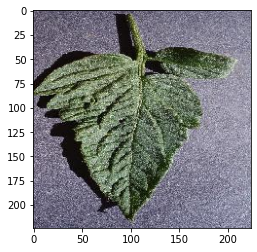

In [38]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
img=image.load_img('data/valid/Tomato___healthy/0d515778-61ef-4f0b-ab54-75607c80220f___RS_HL 9745_180deg.JPG',target_size=(224,224))
image_array = image.img_to_array(img)
np_image = np.array(image_array, dtype=np.float16) / 255.0
np_image = np.expand_dims(np_image,0)
plt.imshow(img)
result = model.predict(np_image)
result = model.predict(np_image)
result=np.argmax(result,axis=1)
result=result[0]
if result==0:
    print("spot")
elif result==1:
    print("early_blight")
elif result==2:
    print("Tomato_blight")
elif result==3:
    print("leaf_mold")
else:
    print("Tomato_Healthy")